In [1]:
import proplot as pplt
import matplotlib as plt
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from matplotlib_scalebar.scalebar import ScaleBar
import numpy as np
import pandas as pd
import geopandas as gpd
import rasterio as rio
from rasterio.plot import show
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.patches as mpatches
from shapely import wkt
from rasterio.warp import calculate_default_transform, reproject, Resampling
from rasterio.transform import array_bounds
import rasterio.mask as rmask
from shapely import Polygon

In [2]:
arnot_forest_s2 = rio.open('./Data/Cloud Cover/arnot_forest_clear_count_s2.tif')
arnot_forest_ls = rio.open('./Data/Cloud Cover/arnot_forest_clear_count_ls.tif')
arnot_forest_modis = rio.open('./Data/Cloud Cover/arnot_forest_clear_count_MODIS.tif')

mt_pleasant_s2 = rio.open('./Data/Cloud Cover/mt_pleasant_clear_count_s2.tif')
mt_pleasant_ls = rio.open('./Data/Cloud Cover/mt_pleasant_clear_count_ls.tif')
mt_pleasant_modis = rio.open('./Data/Cloud Cover/mt_pleasant_clear_count_MODIS.tif')

allegheny_s2 = rio.open('./Data/Cloud Cover/allegheny_clear_count_s2.tif')
allegheny_ls = rio.open('./Data/Cloud Cover/allegheny_clear_count_ls.tif')
allegheny_modis = rio.open('./Data/Cloud Cover/allegheny_clear_count_MODIS.tif')

turkey_point_s2 = rio.open('./Data/Cloud Cover/turkey_point_clear_count_s2.tif')
turkey_point_ls = rio.open('./Data/Cloud Cover/turkey_point_clear_count_ls.tif')
turkey_point_modis = rio.open('./Data/Cloud Cover/turkey_point_clear_count_MODIS.tif')

In [3]:
allegheny_ls.read().shape

(1, 1539, 1313)

In [4]:
dest_crs = ccrs.LambertConformal(central_longitude=-76.0, central_latitude=42.0,)

def prepare_for_viz(raster_file, dest_crs, mask_polygon=None):
    if mask_polygon is not None:
        orig_image, orig_transform = rmask.mask(raster_file, [mask_polygon], crop=True)
    else:
        orig_image = raster_file.read()
        orig_transform = raster_file.transform
        
    transform, width, height = calculate_default_transform(
        raster_file.crs, dest_crs, raster_file.width, raster_file.height, *raster_file.bounds)
    
    new_image, new_transform = reproject(
        source=orig_image,
        src_transform=orig_transform,
        src_crs=raster_file.crs,
        dst_crs=dest_crs,
        resampling=Resampling.nearest,
        dst_nodata=0)
    
    new_bounds = array_bounds(new_image.shape[1], new_image.shape[2], new_transform)
    #new_image = np.concatenate([new_image, new_image, new_image])
    new_image = new_image.transpose([1, 2, 0])
    #new_image[:, :, 0:3] = np.clip(new_image[:, :, 0:3] / np.nanpercentile(new_image, 95), 0, 1)
    
    # Create a nan mask
    #alpha_channel = ~np.isnan(new_image[:, :, [0]])
    #new_image = np.concatenate([new_image, alpha_channel], axis=2)

    return new_image, new_bounds

# Arnot Forest
af_s2_reproj, af_s2_reproj_bounds = prepare_for_viz(arnot_forest_s2, dest_crs)
af_ls_reproj, af_ls_reproj_bounds = prepare_for_viz(arnot_forest_ls, dest_crs)
af_modis_reproj, af_modis_reproj_bounds = prepare_for_viz(arnot_forest_modis, dest_crs)

# Mt. Pleasant
mtp_s2_reproj, mtp_s2_reproj_bounds = prepare_for_viz(mt_pleasant_s2, dest_crs)
mtp_ls_reproj, mtp_ls_reproj_bounds = prepare_for_viz(mt_pleasant_ls, dest_crs)
mtp_modis_reproj, mtp_modis_reproj_bounds = prepare_for_viz(mt_pleasant_modis, dest_crs)

# Allegheny
alle_s2_reproj, alle_s2_reproj_bounds = prepare_for_viz(allegheny_s2, dest_crs)
alle_ls_reproj, alle_ls_reproj_bounds = prepare_for_viz(allegheny_ls, dest_crs)
alle_modis_reproj, alle_modis_reproj_bounds = prepare_for_viz(allegheny_modis, dest_crs)

# Turkey Point
tp_s2_reproj, tp_s2_reproj_bounds = prepare_for_viz(turkey_point_s2, dest_crs)
tp_ls_reproj, tp_ls_reproj_bounds = prepare_for_viz(turkey_point_ls, dest_crs)
tp_modis_reproj, tp_modis_reproj_bounds = prepare_for_viz(turkey_point_modis, dest_crs)

In [5]:
af_s2_reproj.shape

(522, 665, 1)

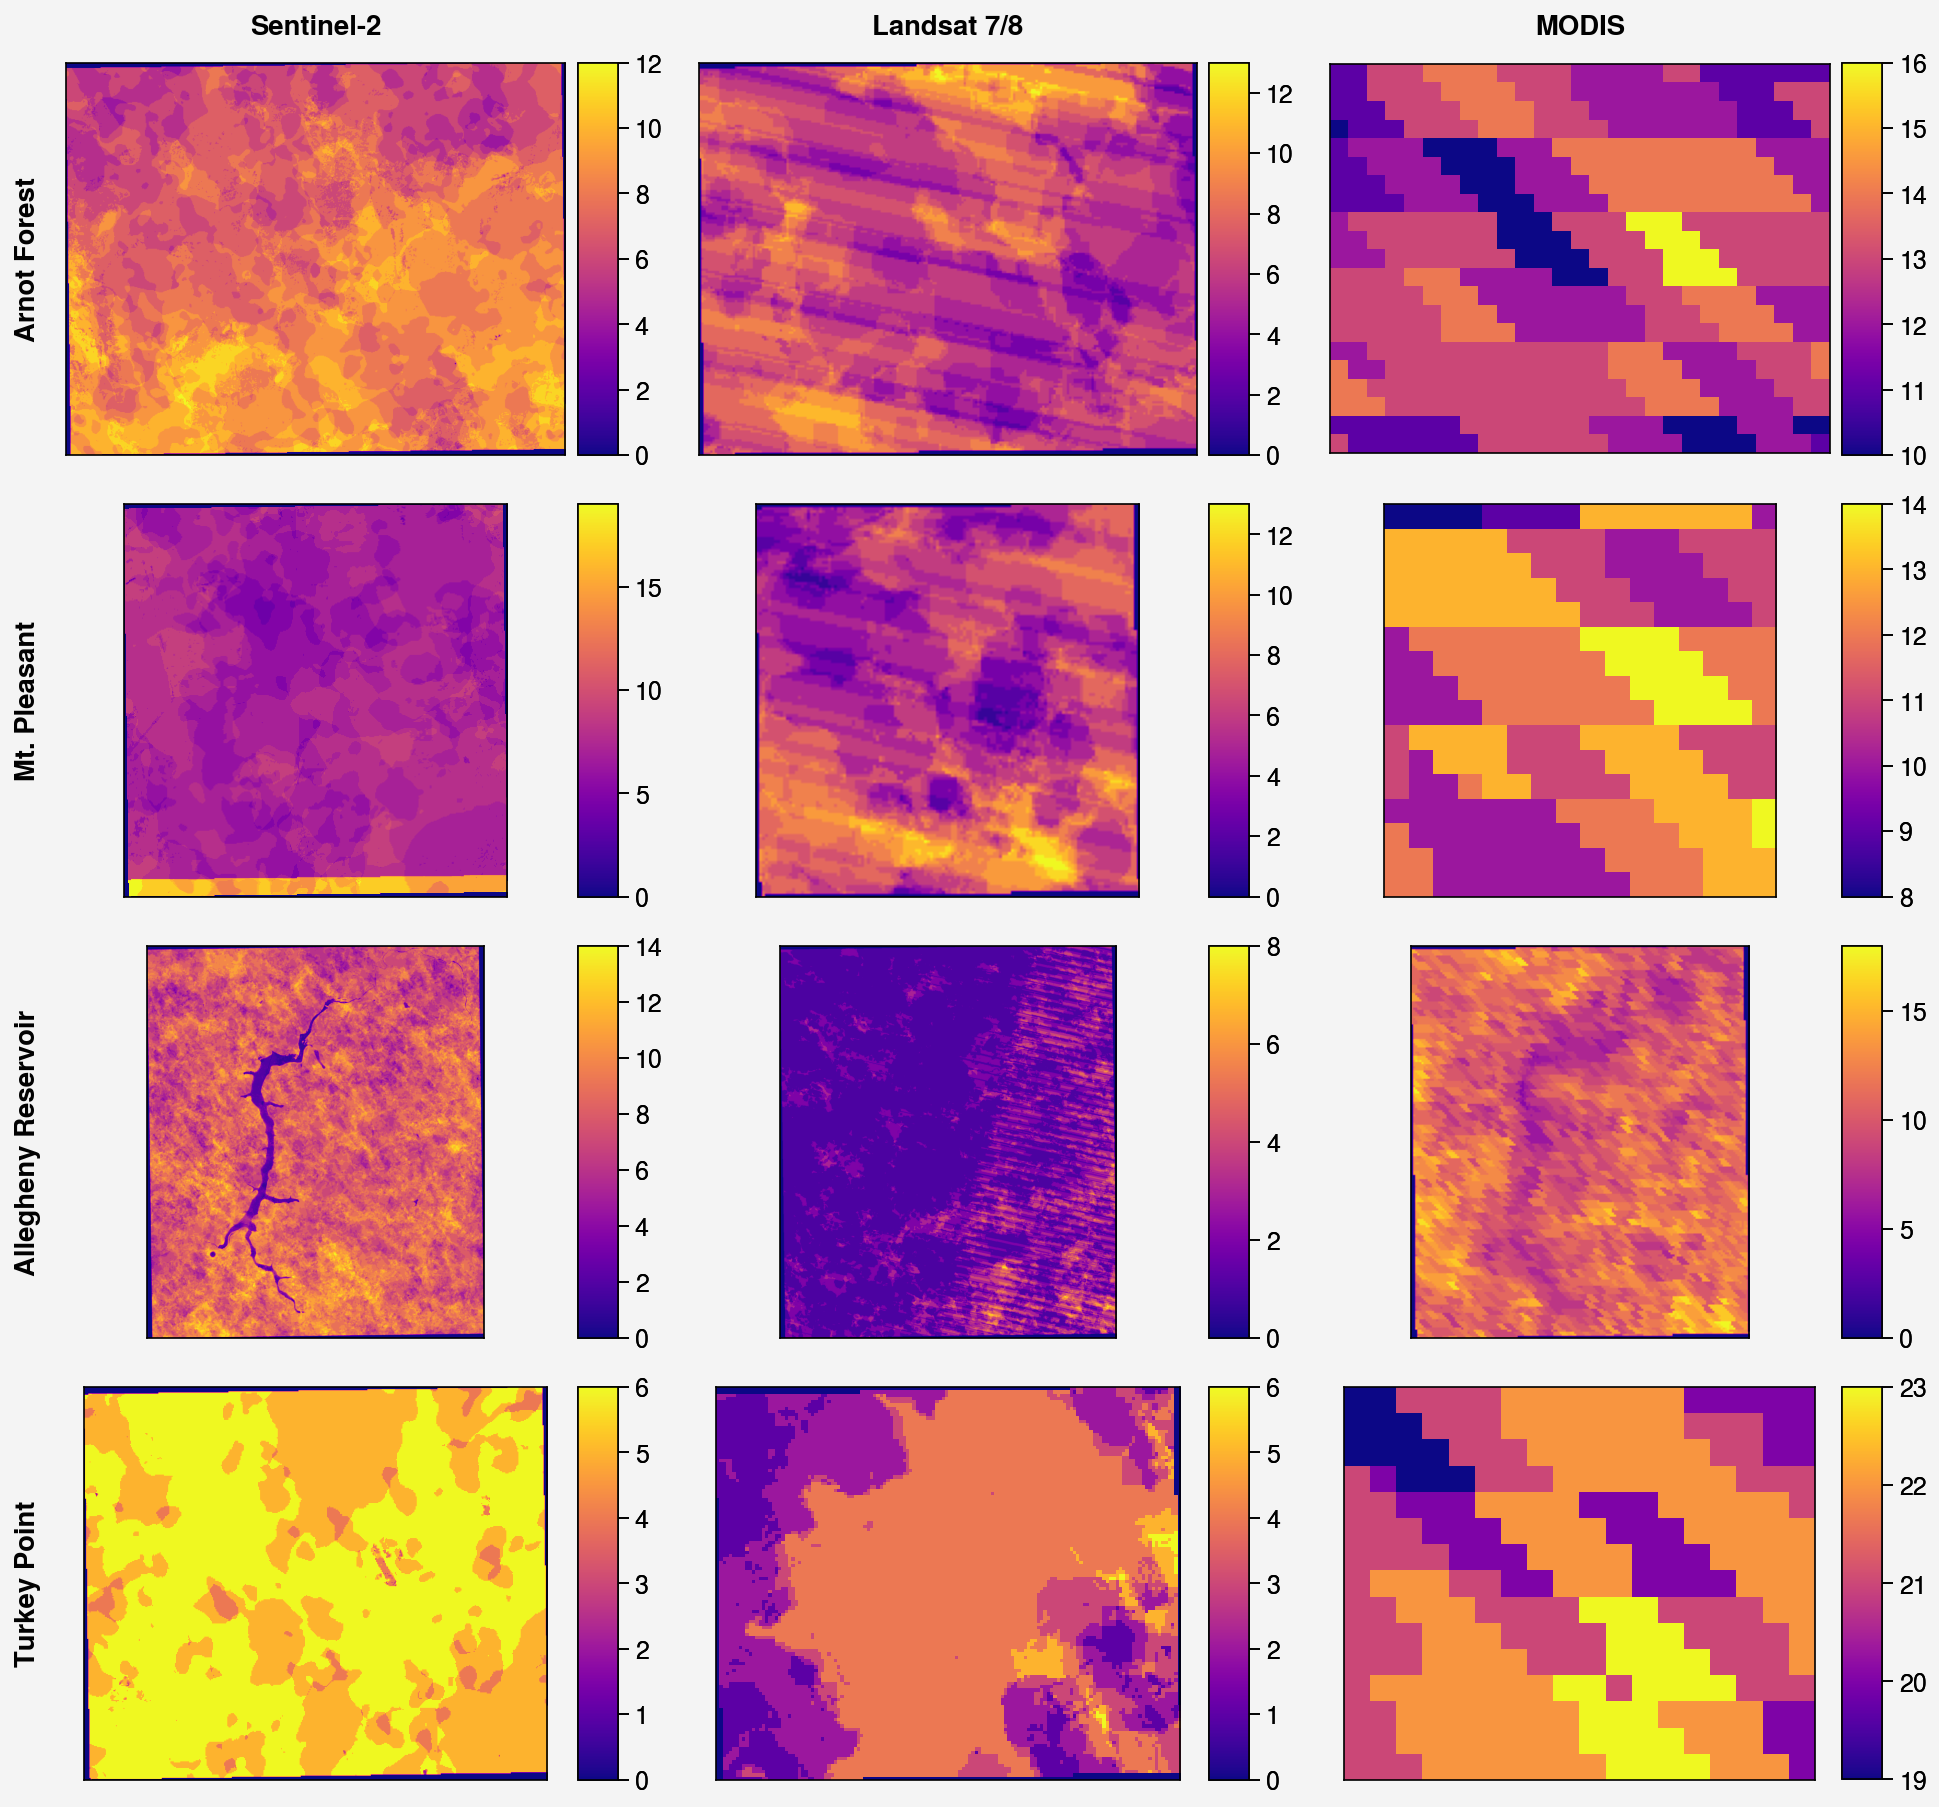

In [16]:
dest_crs = ccrs.LambertConformal(central_longitude=-76.0, central_latitude=42.0,)
fig, axes = pplt.subplots(ncols=3, nrows=4, share=False)

axes[0].imshow(af_s2_reproj[:, :, 0], colorbar=True, cmap='plasma')
axes[1].imshow(af_ls_reproj[:, :, 0], colorbar=True, cmap='plasma')
axes[2].imshow(af_modis_reproj[:, :, 0], colorbar=True, cmap='plasma')

axes[3].imshow(mtp_s2_reproj[:, :, 0], colorbar=True, cmap='plasma')
axes[4].imshow(mtp_ls_reproj[:, :, 0], colorbar=True, cmap='plasma')
axes[5].imshow(mtp_modis_reproj[:, :, 0], colorbar=True, cmap='plasma')

axes[6].imshow(alle_s2_reproj[:, :, 0], colorbar=True, cmap='plasma')
axes[7].imshow(alle_ls_reproj[:, :, 0], colorbar=True, cmap='plasma')
axes[8].imshow(alle_modis_reproj[:, :, 0], colorbar=True, cmap='plasma')

axes[9].imshow(tp_s2_reproj[:, :, 0], colorbar=True, cmap='plasma')
axes[10].imshow(tp_ls_reproj[:, :, 0], colorbar=True, cmap='plasma')
axes[11].imshow(tp_modis_reproj[:, :, 0], colorbar=True, cmap='plasma')

axes.format(xlocator='null', ylocator='null', rowlabels=['Arnot Forest', 'Mt. Pleasant', 'Allegheny Reservoir', 'Turkey Point'],
                                              collabels=['Sentinel-2', 'Landsat 7/8', 'MODIS'])

fig.savefig('./Figures/Cloud Cover/defol_2021_clear_image_count.png')